# **LOAN PREDICTION**

# 1.0) Project Overview

Loans refer to the sum of money that is lent to other parties in exchange for future repayment of the principal amount with interest. Lenders will consider a prospective borrower's income, credit score, and debt levels before granting them a loan. Loans may be secured by collateral or may be unsecured.

Lenders may grant a loan after an intensive process of verification and validation. However, they are still not assured whether the applicant will be able to repay the loan with no difficulties or not.

# 1.2) Problem Statement

The main revenue generating activity for insurance companies is changing.


#1.3) Objectives
#a) Main objective
The objective of this project is to develop a predictive model to check if an applicant is able to repay the lending company or not.

#b) Specific objectives

1. To create a machine learning model that will make the predictions.


2. To establish whether a customer will be able to repay a loan or not.

3. To anticipate future patterns in customer lending.


# 1.4)Specifying the question


1.   Will a customer have their loan approved?

# 1.5) Defining the metric of success

* Perform Exploratory Data Analysis on the dataset.

* Project will be considered successful if we train a machine learning model that will be able to predict whether a customer will have their loan approved and challenge the solution by fine tuning the model to get the best performance.

* Achieve a F1 Score of 0.90




#1.6) Understanding the question

This dataset is named Loan Prediction Dataset data set. The dataset contain records under 13 attributes:

Train file will be used for training the model. It contains all the independent variables and the target variable.

Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

Below are the various variables in our dataset;

1. **Loan_ID** :	A unique loan ID
2. **Gender**  :	Male/Female
3.  **Married** :	Married(Yes)/ Not married(No)
4. **Dependents**:	Number of persons depending on the applicant
5. **Education** : Applicant education(Undergraduate/Graduate)
6.	**Self_Employed** :	Self employed(Yes/No)
7.	**Applicant Income** : The applicant's income
8.	**Coapplicant's income** :	Coapplicant's income
9.  **LoanAmount** : Loan amount in 1000's
10. **Loan_Amount_Term** :Term of loan in months
11.	**Credit_History** :	Credit history meets guidelines
12. **Property_Area** : Urban/Semi and Rural
13. **Loan_Status** :	Loan approved(Y or N)



#1.7) Experimental Design Taken

1. Loading the required libraries
2. Reading and previewing dataset
3. Tidying the data
4. Exploratory Data Analysis
5. Implementing the solution
6. Challenging the solution

# 1.8) Data Relevance
The dataset is relevant for the analysis process.This dataset provides a complete overview on the information required by the lenders in determining whether a loan will be approved or not.

The dataset was extracted from [Kaggle](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset/code?select=train_u6lujuX_CVtuZ9i.csv)

# 2) Reading the data

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading files into dataframes
train =pd.read_csv('/content/drive/MyDrive/LOAN DETECTION DATASET/train_u6lujuX_CVtuZ9i.csv')
test =pd.read_csv('/content/drive/MyDrive/LOAN DETECTION DATASET/test_Y3wMUE5_7gLdaTN.csv')



# 3) Understanding the data

In [ ]:
# Preview the first five rows of the train set

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Preview the first five rows of the test set

test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
#Checking the number of entries in train and test sets

print(f' Shape of train dataset is: {train.shape} \n Shape of test dataset is: {test.shape}')


 Shape of train dataset is: (614, 13) 
 Shape of test dataset is: (367, 12)


In [ ]:
# Checking our columns

print(train.columns)
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [ ]:
#The 'Type' column to be used to split train and test set from the combined dataframe

train['Type'] = '0'
test['Type'] = '1'

# Combine train and test set
combined_data = pd.concat((train, test)).reset_index(drop =True)
combined_data



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,1
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,1
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,1
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,1


In [ ]:
#check the details about the dataset

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Type               981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


**Observation**


*   Dtype:object: The categorical variables in our dataset are Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.
*   Dtype:int64: The integer variable ApplicantIncome is of this format.
*   Dtype:float64: It represents the numerical variable that has some decimal values
*   There are missing values in 8 columns

In [ ]:
#check the number and value of unique values in each column

for column in combined_data.columns:
  print(column)
  print(combined_data[column].nunique())
  print(combined_data[column].unique())
  print('------------------------------------------------------------------')


Loan_ID
981
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP00

In [ ]:
#check for duplicate rows

sum(combined_data.duplicated())

0

**Observation**

*   There are no duplicate rows

In [ ]:
# Identify the missing data

#Sum of missing values in each column

combined_data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Type                   0
dtype: int64

**Observation**

*   The output gives the sum of missing values in the columns




In [ ]:
combined_data['Total_income']=combined_data.ApplicantIncome + combined_data.CoapplicantIncome

In [ ]:
combined_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,6000.0


In [ ]:
#Statistical summary of the dataframe

combined_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
count,981.000000,981.000000,954.000000,961.000000,902.000000,981.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920,6781.711437
std,5695.104533,2718.772806,77.421743,65.100602,0.370553,6023.952550
min,0.000000,0.000000,9.000000,6.000000,0.000000,1442.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000,4166.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000,5314.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000,7308.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


**Observation**

* The output gives the mean, standard deviation, min, max and 25th,50th & 75th percentiles of the numerical columns


# 4) Tidying the Dataset


In [ ]:
#Fill the null values

combined_data['Gender'].fillna(combined_data.Gender.mode()[0],inplace=True)
combined_data['Married'].fillna(combined_data.Married.mode()[0],inplace=True)
combined_data['Dependents'].fillna(combined_data.Dependents.mode()[0],inplace=True)
combined_data['Self_Employed'].fillna(combined_data.Self_Employed.mode()[0],inplace=True)
combined_data['LoanAmount'].fillna(combined_data.LoanAmount.mean(),inplace=True)
combined_data['Credit_History'].fillna(combined_data.Credit_History.mean(),inplace=True)
combined_data['Loan_Amount_Term'].fillna(combined_data.Loan_Amount_Term.mean(), inplace=True)

**Observation**
*  Filled the null values with mean and mode

In [ ]:
# Confirm if any null values exist

combined_data[combined_data.columns.difference(['Loan_Status'])].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Married              0
Property_Area        0
Self_Employed        0
Total_income         0
Type                 0
dtype: int64

**Observation**

*   Zero indicates there are no null values in the columns

In [ ]:
# Encode the categorical variables

from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le=LabelEncoder()
for col in cols:
  combined_data[col]= le.fit_transform(combined_data[col])

In [ ]:
print(combined_data["Type"].unique())

['0' '1']


# 5) Exploratory Data Analysis




> # 5.1 Univariate Analysis

In [ ]:
# Explore the target variable(Loan Status)

train['Loan_Status'].value_counts(normalize=True)*100


Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

**Observation**

*   68.7% of the loan applications were approved
*   31.2% of the loan applications were rejected



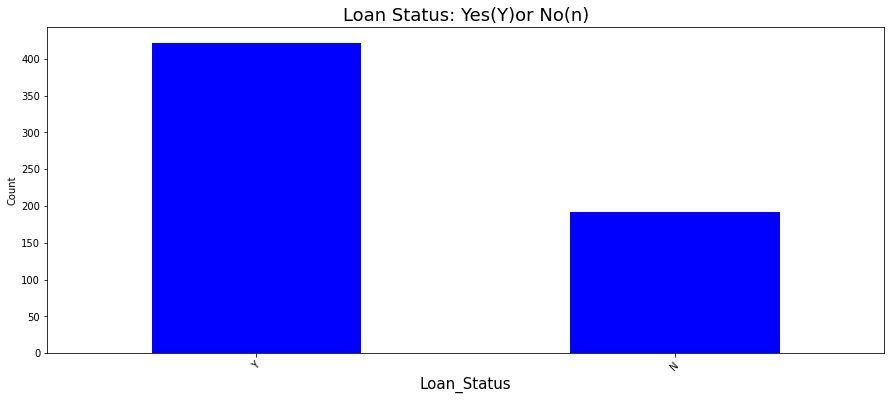

In [ ]:
import matplotlib.pyplot as plt
train['Loan_Status'].value_counts().plot(kind='bar',figsize=(15,6), color='b')
plt.xlabel('Loan_Status', fontsize= 15)
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title('Loan Status: Yes(Y)or No(n)', fontsize = 18);


**Observation**

*   The loan of about 400 out of 623 applicants was approved(68.7%)
*   About 200 of the applications were rejected(31%)



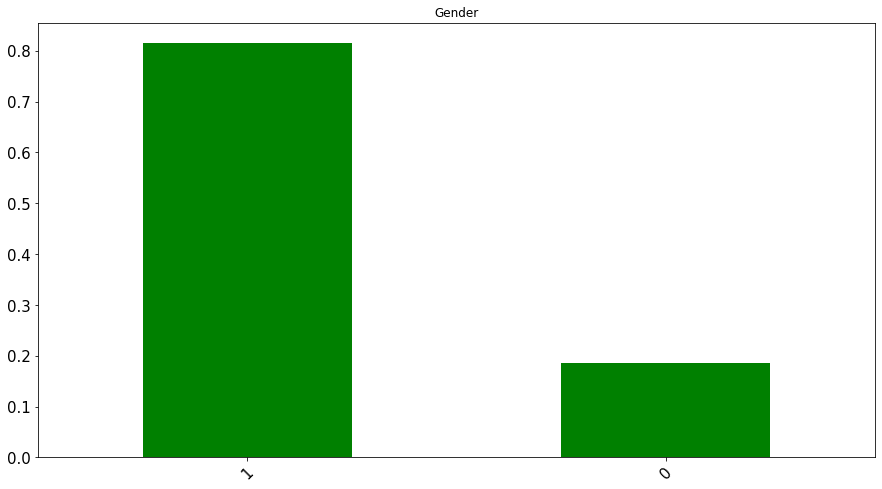

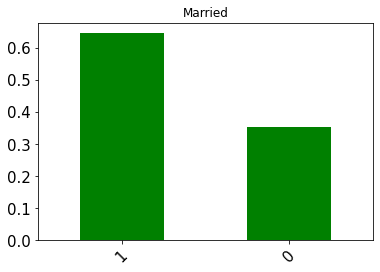

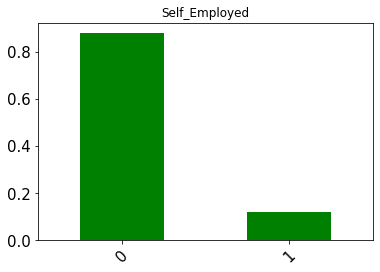

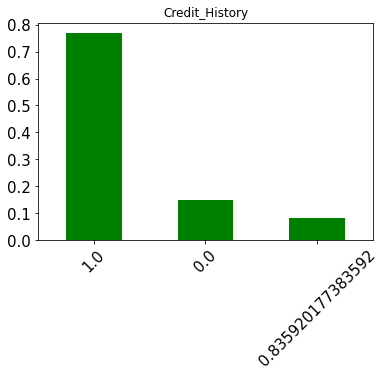

In [ ]:
#Visualize the categorical variables

combined_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,8), title='Gender',fontsize= 15,color=['green'])
plt.xticks(rotation = 45)
plt.show()

combined_data['Married'].value_counts(normalize=True).plot.bar((15,8),title='Married',fontsize= 15,color=['green'])
plt.xticks(rotation = 45)
plt.show()

combined_data['Self_Employed'].value_counts(normalize=True).plot.bar((15,8),title='Self_Employed',fontsize= 15,color=['green'])
plt.xticks(rotation = 45)
plt.show()

combined_data['Credit_History'].value_counts(normalize=True).plot.bar((15,8),title='Credit_History',fontsize= 15,color=['green'])
plt.xticks(rotation = 45)
plt.show()

**Observation**

*   Approximately 80% of the loan applicants are male
*   More than 60% of the applicants are married
*   Approximately 80% of the loan applicants are are not self-employed
*   About 80% of the applicants have a credit history with the institution



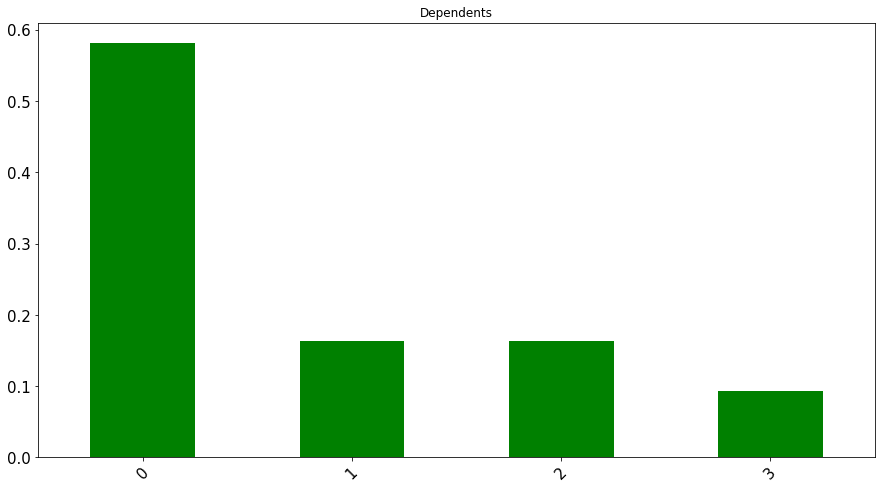

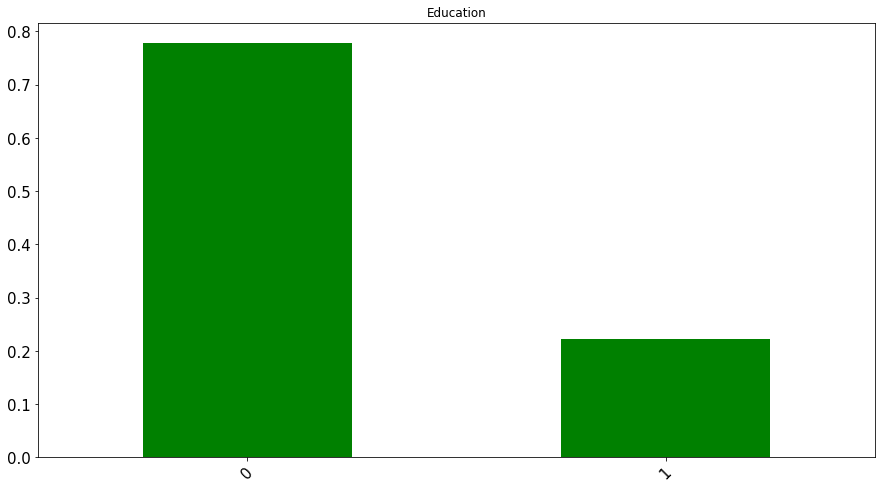

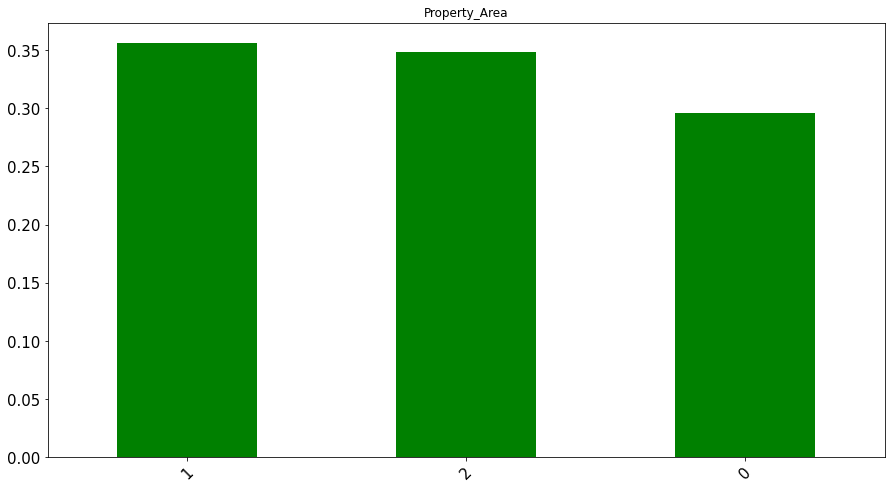

In [ ]:
#Visualize the ordinal variables

combined_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,8), title='Dependents',fontsize= 15,color=['green'])
plt.xticks(rotation = 45)
plt.show()
combined_data['Education'].value_counts(normalize=True).plot.bar(title='Education',figsize= (15,8),fontsize= 15,color=['green'])
plt.xticks(rotation = 45)
plt.show()
combined_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area',figsize= (15,8),fontsize= 15,color=['green'])
plt.xticks(rotation = 45)
plt.show()

**Observation**

*  Most of the applicants do not have any dependents.
*  Around 80% of the applicants are graduates.
*  Most of the applicants are from the Semiurban areas.

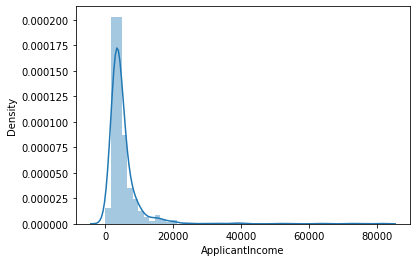

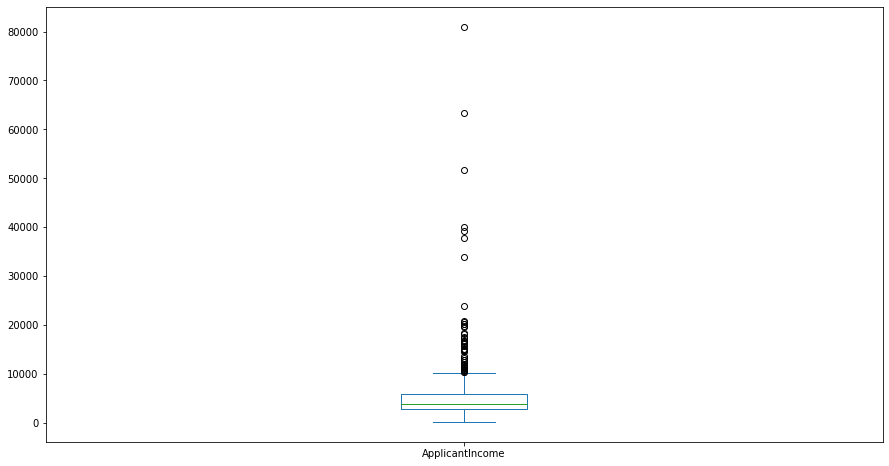

In [ ]:
# Visualize the numerical variables
sns.distplot(combined_data['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(15,8))
plt.show()

**Observation**
*  The applicants' income is skewed to the right;not normally distributed
*  The boxplot shows the presence of outliers in this category; the disparity in income could be attributed to the different eduation levels;the graduates could be earning more than their counterparts.

Text(0.5, 0.98, 'Applicant Income by Education Level')

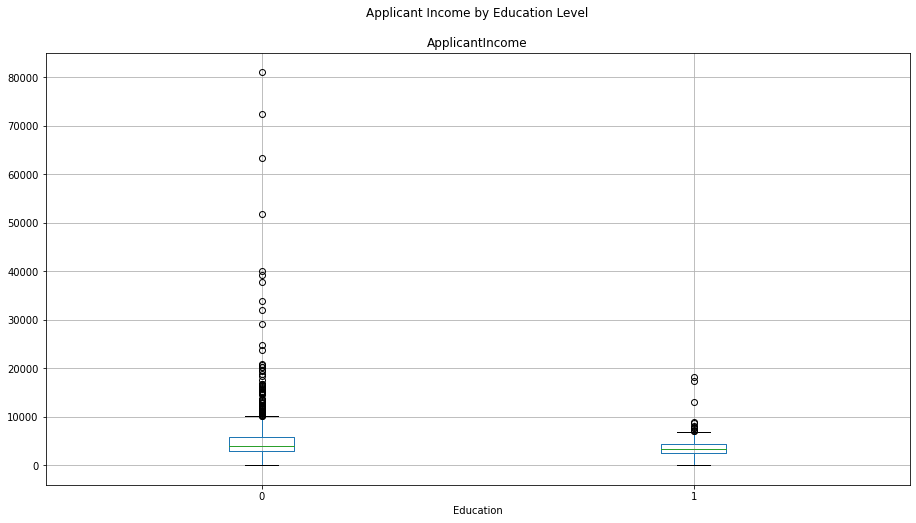

In [ ]:
# Check how education affects the income
combined_data.boxplot(column='ApplicantIncome', by = 'Education',figsize=(15,8))
plt.suptitle("Applicant Income by Education Level")

**Observation**

*  There are several graduate loan applicants with incomes greater than 30000, which are appearing as outliers

   >> # 5.2 Bivariate Analysis

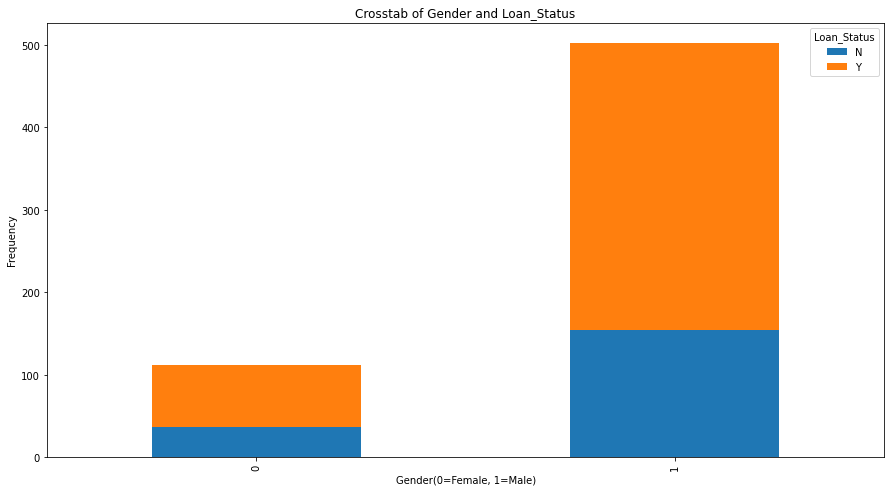

In [ ]:
ct = pd.crosstab(combined_data['Gender'], train['Loan_Status'])
ct.plot(kind='bar', stacked=True, figsize=(15,8))
plt.xlabel('Gender(0=Female, 1=Male)')
plt.ylabel('Frequency')
plt.title('Crosstab of Gender and Loan_Status')
plt.show()







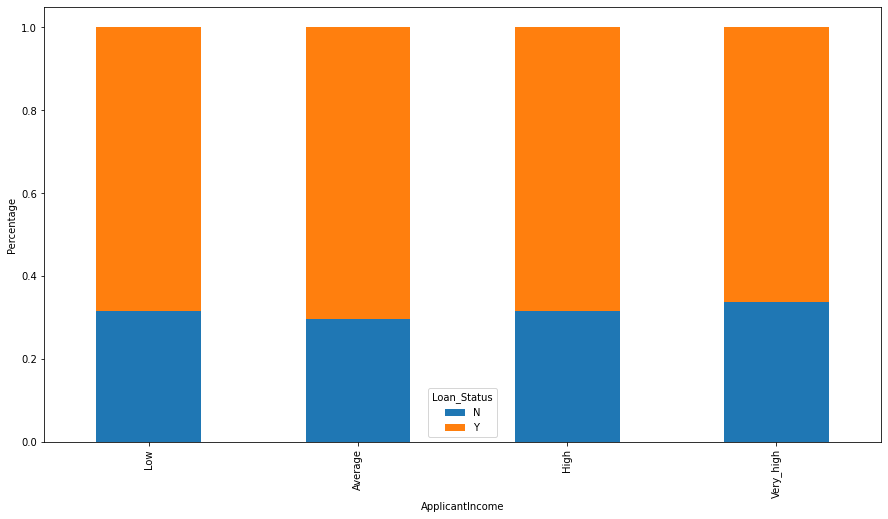

In [ ]:
#Check the relationship between an applicant's income and loan approval
#Use bar chart
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very_high']
combined_data['Income_bin']=pd.cut(combined_data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(combined_data['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(15,8))
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')


**Observation**
* An applicant's income does not affect the chances of approval

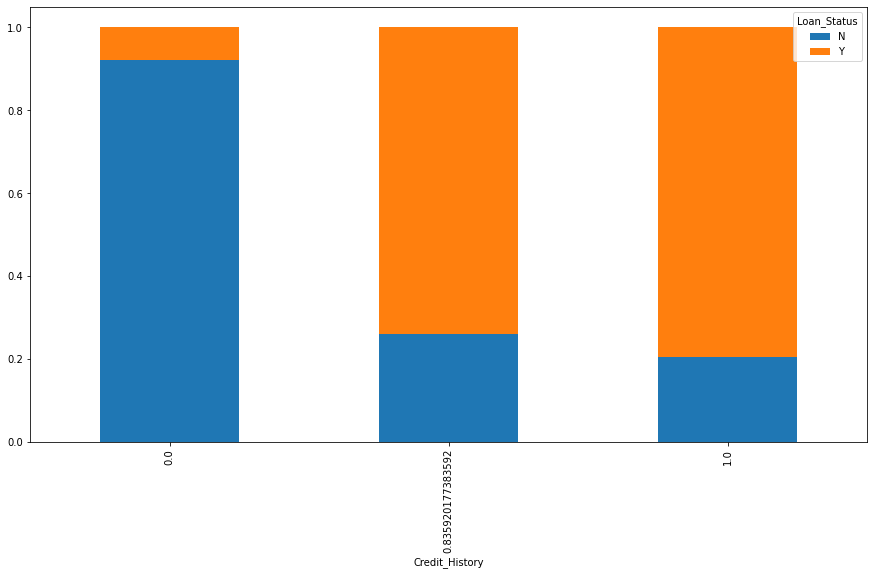

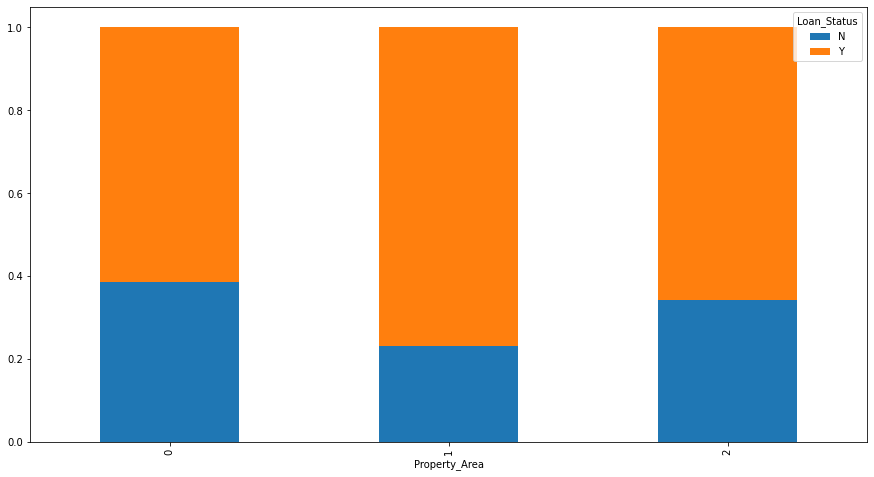

In [ ]:
# Check the relationship between an applicant's credit history and loan status
#Use bar chart

Credit_History=pd.crosstab(combined_data['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(combined_data['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(15,8))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(15,8))
plt.show()

**Observation**
*  Applicants with credit history (1) are more likely to have their loans approved.

*  The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

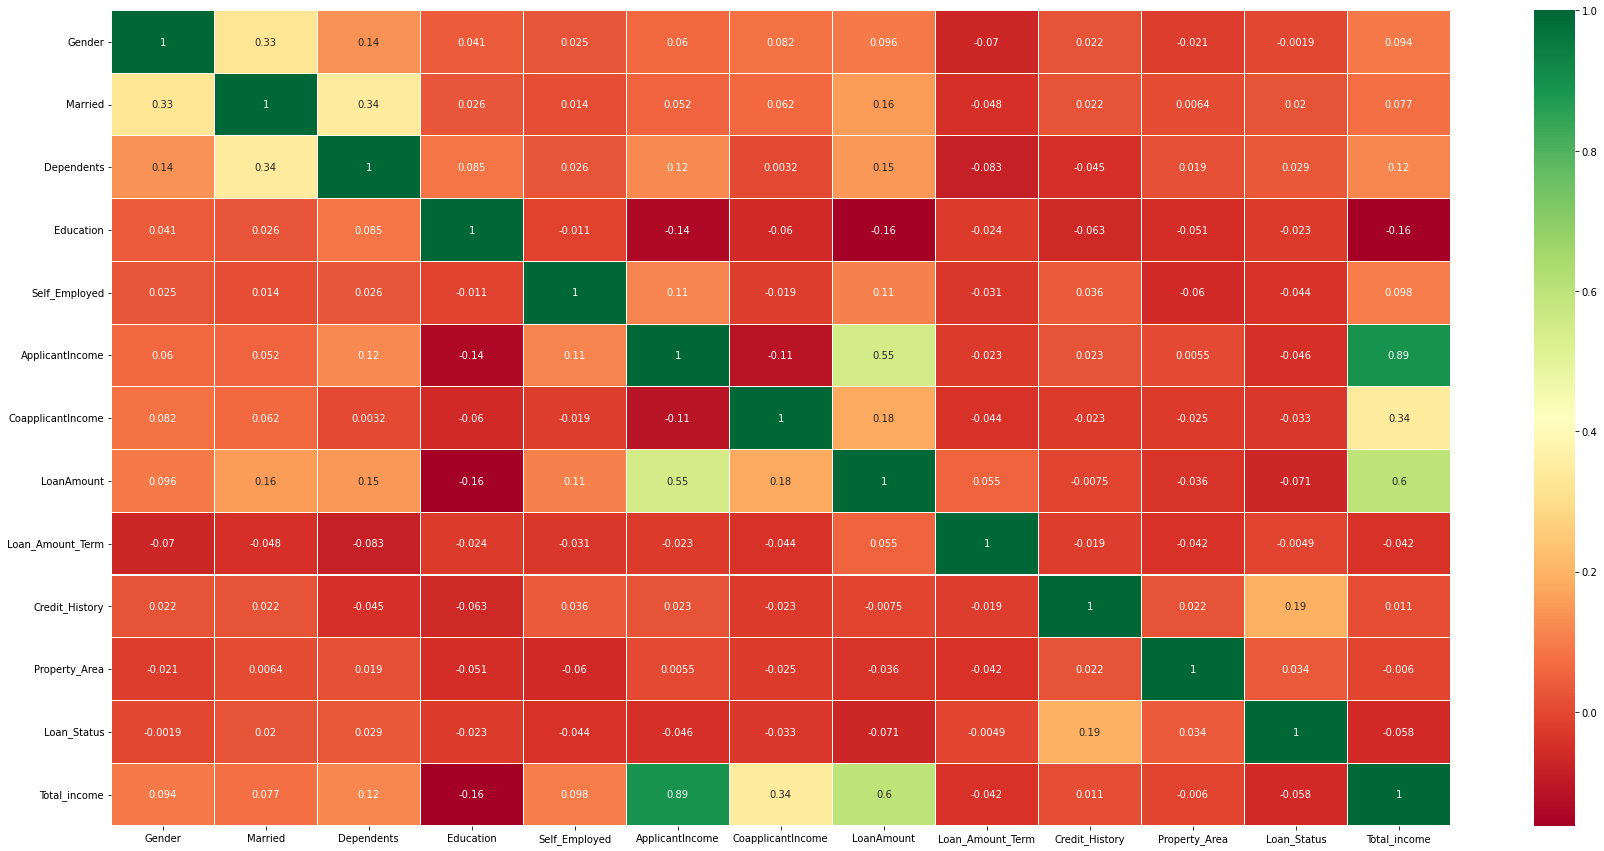

In [ ]:
# Correlation between the numerical variables
corrMatrix = combined_data.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(30,15))
title="Correlation Matrix"
sns.heatmap(corrMatrix, annot=True,  linewidths=.1, ax=ax,cmap='RdYlGn');

# 6) Implementing the Solution

> Indented block



## Data Pre -processing

In [ ]:
# Check the dataset
combined_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type,Total_income
0,LP001002,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,1,0,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,1,0,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1,0,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,1,0,6000.0


In [ ]:
#Drop the unnecessary Income bin column

combined_data.drop(columns='Income_bin', inplace=True)
combined_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type,Total_income
0,LP001002,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,1,0,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,1,0,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1,0,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,1,0,6000.0


**Observation**

*  The income bin column has been dropped

In [ ]:
# Separate train and test data from the combined dataframe

train_df = combined_data[combined_data['Type'] == 0]
test_df = combined_data[combined_data['Type'] == 1]

train_df.shape

NameError: ignored

In [ ]:
test_df.info()

In [ ]:
#drop type column  from train as it doesnt have any use now
train_df.drop(['type'], axis = 1, inplace = True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11511 entries, 0 to 12078
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       11511 non-null  int64  
 1   Age                          11511 non-null  int64  
 2   No_Pol                       11511 non-null  int64  
 3   Car_Category                 11511 non-null  int64  
 4   Subject_Car_Colour           11511 non-null  int64  
 5   Subject_Car_Make             11511 non-null  int64  
 6   LGA_Name                     11511 non-null  int64  
 7   State                        11511 non-null  int64  
 8   ProductName                  11511 non-null  int64  
 9   target                       11511 non-null  float64
 10  Policy_Duration              11511 non-null  int64  
 11  Policy Start Dateyear        11511 non-null  int64  
 12  Policy Start Datemonth       11511 non-null  int64  
 13  Policy Start Dat